Normal distribution
 
 In this tutorial we'll investigate the probability distribution that is most central to statistics: the normal distribution. If we are confident that our data are nearly normal, that opens the door to many powerful statistical methods. Here we'll use the graphical tools of Python to assess the normality of a dataset and also learn how to generate random numbers from a normal distribution.

The data

Here we'll be working with measurements of body dimensions. This data set contains measurements from 247 men and 260 women, most of whom were considered healthy young adults.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/openintro/bdims.csv'
url_content = requests.get(df_url, verify=False).content
bdims = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [2]:
pd.set_option('display.max_columns', None)
print(bdims.shape)
bdims.head()

(507, 25)


,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,che.gi,wai.gi,nav.gi,hip.gi,thi.gi,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,89.5,71.5,74.5,93.5,51.5,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,97.0,79.0,86.5,94.8,51.5,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,97.5,83.2,82.9,95.0,57.3,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,97.0,77.8,78.8,94.0,53.0,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,97.5,80.0,82.5,98.5,55.4,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


In [9]:
mdims = bdims[bdims['sex'] == 1]
fdims = bdims[bdims['sex'] == 0]

Exercise 1

Make a histogram of men's heights and a histogram of women's heights. How would you compare the various aspects of the two distributions?


The normal distribution


In your description of the distributions, did you use words like bell-shaped or normal? It's tempting to say so when faced with a unimodal symmetric distribution.

To see how accurate that description is, we can plot a normal distribution curve on top of a histogram to see how closely the data follow a normal distribution. This normal curve should have the same mean and standard deviation as the data. We'll be working with women's heights, so let's store them as a separate object and then calculate some statistics that will be referenced later.

In [23]:
fhgtmean = fdims['hgt'].mean()
fhgtsd = fdims['hgt'].std()

In [24]:
mdims

,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,che.gi,wai.gi,nav.gi,hip.gi,thi.gi,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,89.5,71.5,74.5,93.5,51.5,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,97.0,79.0,86.5,94.8,51.5,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,97.5,83.2,82.9,95.0,57.3,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,97.0,77.8,78.8,94.0,53.0,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,97.5,80.0,82.5,98.5,55.4,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,41.7,27.3,31.5,21.8,29.7,14.9,11.8,18.9,13.6,118.2,101.6,85.7,91.0,95.9,50.9,34.0,28.4,35.0,34.3,21.1,16.3,51,79.1,179.1,1
243,43.8,32.2,38.0,25.4,32.0,16.0,10.7,21.0,16.8,126.3,103.1,96.5,99.0,111.8,62.3,34.8,27.5,41.7,37.0,24.3,16.7,30,98.2,190.5,1
244,41.9,28.0,33.1,26.4,29.9,15.6,11.5,21.2,15.9,121.0,104.6,82.4,85.7,99.9,63.3,38.6,32.0,38.4,39.8,25.4,18.1,24,84.1,177.8,1
245,43.0,27.8,34.2,21.4,31.5,14.3,11.1,21.0,14.8,123.1,104.3,86.3,87.8,103.3,59.7,36.4,30.4,39.3,42.0,27.7,18.4,35,83.2,180.3,1


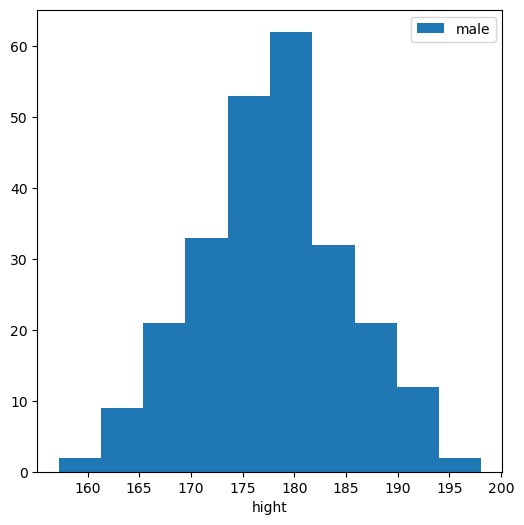

In [25]:
import matplotlib.pyplot as plt


plt.hist(mdims['hgt'], bins=10, label='male')

plt.xlabel('hight')
plt.legend()
plt.show()


Next we make a density histogram to use as the backdrop and use the seaborn.distplot() function to overlay a normal probability curve. The difference between a frequency histogram and a density histogram is that while in a frequency histogram the heights of the bars add up to the total number of observations, in a density histogram the areas of the bars add up to 1. The area of each bar can be calculated as simply the height times the width of the bar. Using a density histogram allows us to properly overlay a normal distribution curve over the histogram since the curve is a normal probability density function. Frequency and density histograms both display the same exact shape; they only differ in their y-axis. You can verify this by comparing the frequency histogram you constructed earlier and the density histogram created by the commands below.

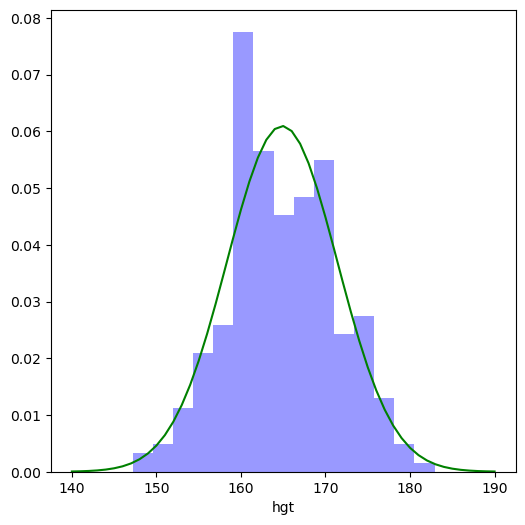

In [31]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (6, 6)

fhgt_hist = sns.distplot(fdims['hgt'], norm_hist = True, kde = False, color = 'blue', bins = 15)
x = np.arange(140, 191)                                                  
y = norm.pdf(x, loc = fhgtmean, scale = fhgtsd)                                                         
fhgt_hist.plot(x, y, 'green');

After plotting the density histogram, we create the x- and y-coordinates for the normal curve. We chose the x range as 140 to 190 in order to span the entire range of women's heights. To create y, we use norm.pdf() from scipy.stats to calculate the density of each of those x-values in a distribution that is normal with mean (fhgtmean) and standard deviation (fhgtsd). The final command draws a curve on the existing density histogram by connecting each of the points specified by x and y.

Exercise 2

Based on the this plot, does it appear that the data follow a nearly normal distribution?

Evaluating the normal distribution
Eyeballing the shape of the histogram is one way to determine if the data appear to be nearly normally distributed, but it can be frustrating to decide just how close the histogram is to the curve. An alternative approach involves constructing a normal probability plot, also called a normal Q-Q plot for "quantile-quantile".

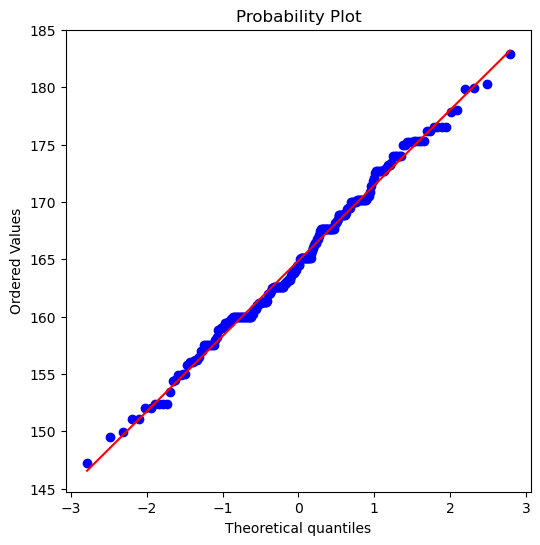

In [27]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(fdims['hgt'], plot = plt)
plt.show();

A data set that is nearly normal will result in a probability plot where the points closely follow the line. Any deviations from normality leads to deviations of these points from the line. The plot for female heights shows points that tend to follow the line but with some errant points towards the tails. We're left with the same problem that we encountered with the histogram above: how close is close enough?

A useful way to address this question is to rephrase it as: what do probability plots look like for data that I know came from a normal distribution? We can answer this by simulating data from a normal distribution using numpy.random.normal().

In [28]:
import numpy as np

sim_norm = np.random.normal(size = len(fdims['hgt']), loc = fhgtmean, scale = fhgtsd)

The first argument indicates how many numbers you'd like to generate, which we specify to be the same number of heights in the fdims data set using the len() function. The last two arguments (loc and scale) determine the mean and standard deviation of the normal distribution from which the simulated sample will be generated. We can take a look at the shape of our simulated data set, sim_norm, as well as its normal probability plot.

Exercise 3

Make a normal probability plot of sim_norm. Do all of the points fall on the line? How does this plot compare to the probability plot for the real data?
Even better than comparing the original plot to a single plot generated from a normal distribution is to compare it to many more plots using the following function:

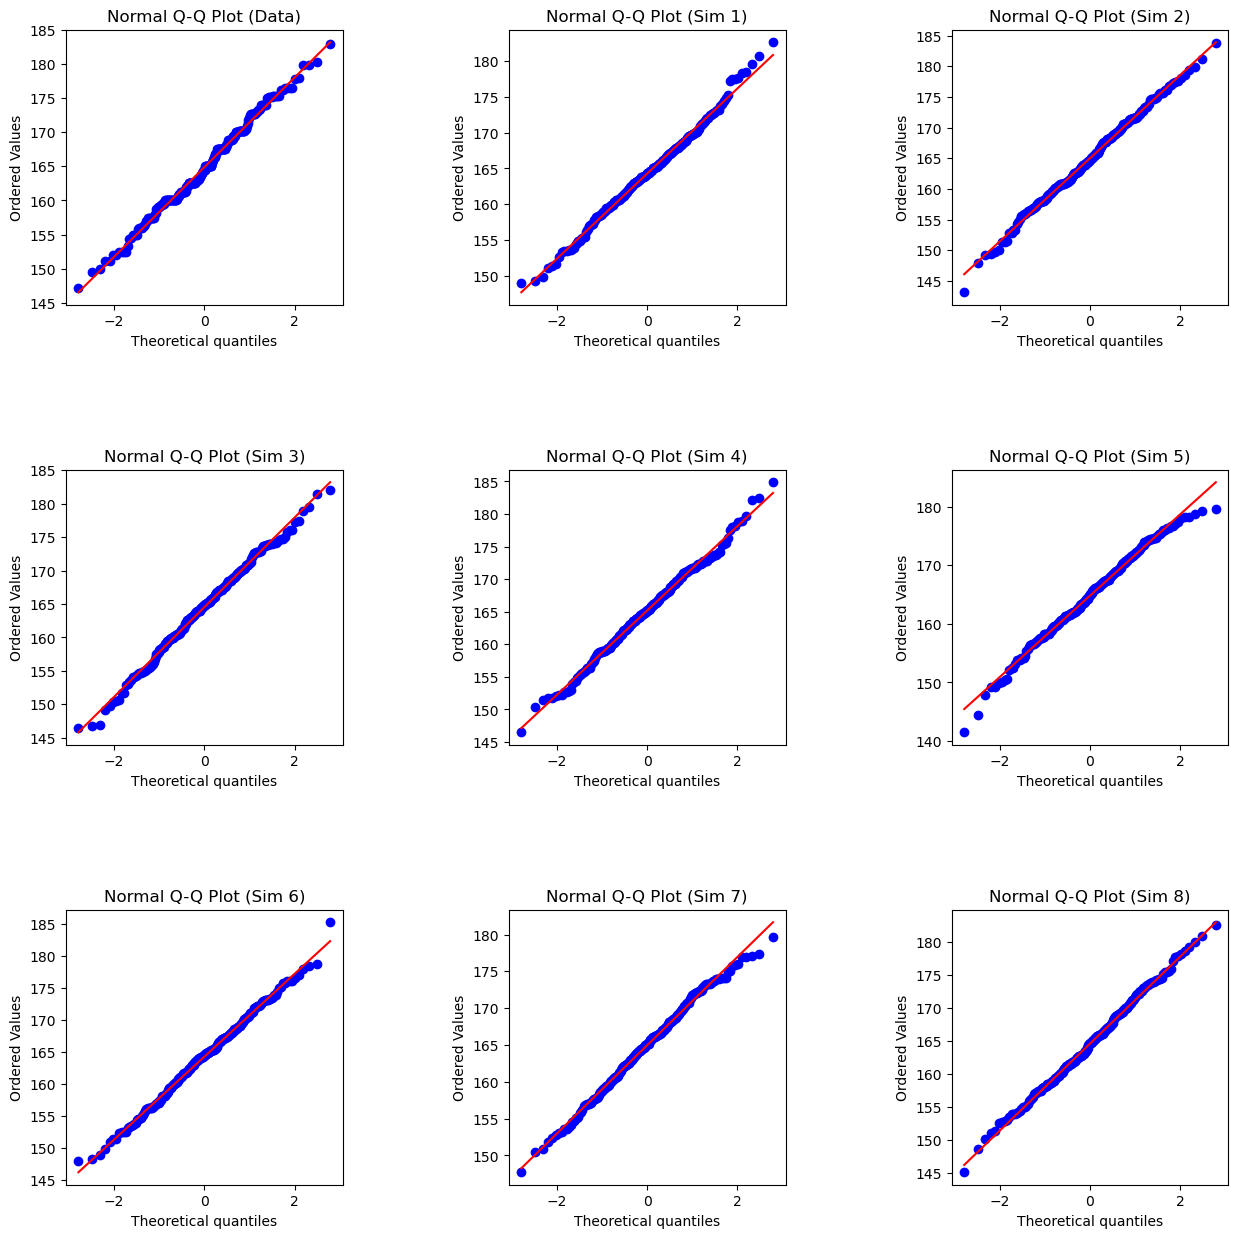

In [29]:
# draw random samples from a normal distribution eight times, 
# so we can construct eight different normal probability plots
sim_norm_8 = []
for i in range(8):
    sim_norm_8.append(np.random.normal(size = len(fdims['hgt']), loc = fhgtmean, scale = fhgtsd))

# compare the original plot to nine plots generated from a normal distribution.
plt.rcParams['figure.figsize'] = (15, 15)
plt.tight_layout(pad = 1) # adjust the subplots to fit in to the figure area.
plt.subplots_adjust(hspace = 0.6, wspace = 0.6) # adjust the amount of width and height reserved for space between subplots.

plt.subplot(3, 3, 1)
probplot(fdims['hgt'], plot = plt)
plt.title('Normal Q-Q Plot (Data)')

plt.subplot(3, 3, 2)
probplot(sim_norm_8[0], plot = plt)
plt.title('Normal Q-Q Plot (Sim 1)')

plt.subplot(3, 3, 3)
probplot(sim_norm_8[1], plot = plt)
plt.title('Normal Q-Q Plot (Sim 2)')

plt.subplot(3, 3, 4)
probplot(sim_norm_8[2], plot = plt)
plt.title('Normal Q-Q Plot (Sim 3)')

plt.subplot(3, 3, 5)
probplot(sim_norm_8[3], plot = plt)
plt.title('Normal Q-Q Plot (Sim 4)')

plt.subplot(3, 3, 6)
probplot(sim_norm_8[4], plot = plt)
plt.title('Normal Q-Q Plot (Sim 5)')

plt.subplot(3, 3, 7)
probplot(sim_norm_8[5], plot = plt)
plt.title('Normal Q-Q Plot (Sim 6)')

plt.subplot(3, 3, 8)
probplot(sim_norm_8[6], plot = plt)
plt.title('Normal Q-Q Plot (Sim 7)')

plt.subplot(3, 3, 9)
probplot(sim_norm_8[7], plot = plt)
plt.title('Normal Q-Q Plot (Sim 8)')

plt.show();

Exercise 4


Does the normal probability plot for fdims['hgt'] look similar to the plots created for the simulated data? That is, do plots provide evidence that the female heights are nearly normal?

Exercise 5

Using the same technique, determine whether or not female weights appear to come from a normal distribution.
